# Die Primzahlfunktion

In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
import sympy
import scipy.integrate as integrate
from datetime import datetime

In [7]:
def get_primes_less_than_or_equal_to(x):
    res = []
    counter = 0
    for i in range(1, x + 1):
        if sympy.isprime(i):
            counter += 1
        res += [counter]
    return res

In [57]:
def plot_prime_counting_function(x, plot_functions=False, plot_log_int=False, plot_riemann_hypothesis=False):
    ar = get_primes_less_than_or_equal_to(x)

    if plot_functions:
        ar_0 = [a / np.log(a) if a != 1 else 0 for a in range(1, x + 1)]
        ar_1 = [a / (np.log(a)-1.08366) for a in range(1, x + 1)]
    if plot_log_int or plot_riemann_hypothesis:
        ar_2_ = [integrate.quad(lambda t: 1/np.log(t), 2, a) for a in range(2, x + 1)]
        ar_2 = [0] + [x[0] for x in ar_2_]
    
    t1 = np.arange(1,x+1,1,dtype = int)
    
    plt.figure(figsize=(10,6))
    plt.step(t1, ar, label="Primzahlfunktion")
    if plot_functions:
        plt.plot(t1, ar_0, label=r"$\frac{x}{\ln(x)}$")
        plt.plot(t1, ar_1, label=r"$\frac{x}{\ln(x) - 1.08366}$")
        
    if plot_log_int:
        plt.plot(t1, ar_2, label=r"$\int_{2}^{x} \frac{\operatorname{d}t}{\ln(t)}$")

    if plot_riemann_hypothesis:
        ar_2_lb = []
        ar_2_ub = []
        for i, v in enumerate(ar_2):
            x_ = i + 1
            er = np.sqrt(x_) * np.log(x_) / 8 / np.pi
            ar_2_lb += [v - er]
            ar_2_ub += [v + er]
        plt.plot(t1, ar_2_lb, label=r"Untere Schranke RH")
        plt.plot(t1, ar_2_ub, label=r"Obere Schranke RH")
        
    plt.axis([0, x, 0, len(set(ar))]) 
    plt.legend(fontsize=14)
    plt.show()

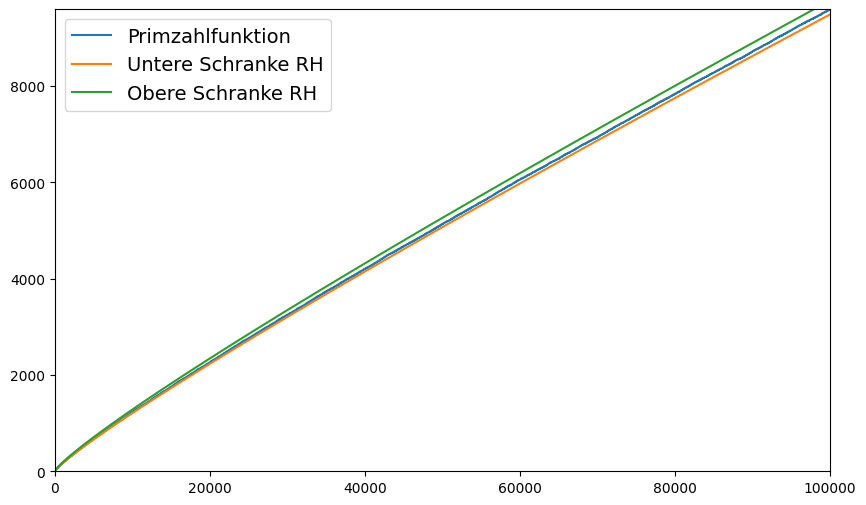

In [60]:
plot_prime_counting_function(100000, plot_riemann_hypothesis=True)

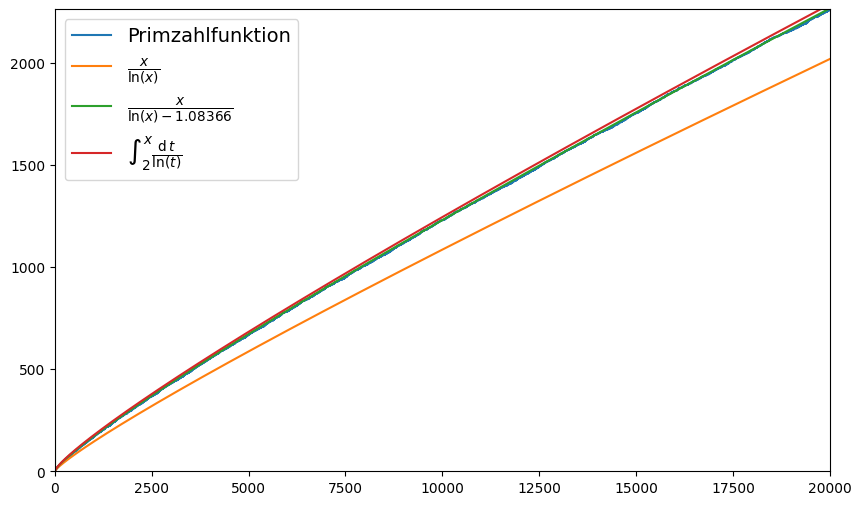

In [26]:
plot_prime_counting_function(20000, plot_functions=True, plot_log_int=True)

# Primfaktorzerlegung von Fastprimzahlen

Eine Fastprimzahl ist eine natürliche Zahl, welche das Produkt von zwei Primzahlen ist.

In [28]:
def format_number(n):
    return str(format(n, ",")).replace(",", "'")

## Mit zufällig erzeugten Primzahlen

In [33]:
NB_DIGITS = 5

In [34]:
# generate tow primes with NB_DIGITS digits
start_time = datetime.now()

p = sympy.randprime(10**(NB_DIGITS - 1), 10**NB_DIGITS - 1)
q = sympy.randprime(10**(NB_DIGITS - 1), 10**NB_DIGITS - 1)

end_time = datetime.now()

print(f"Primzahl 1 mit {NB_DIGITS} stellen:\n{format_number(p)}")
print(f"\nPrimzahl 2 mit {NB_DIGITS} stellen:\n{format_number(q)}")
print(f"\nBenötigte Zeit für die Erzeugung der beiden Primzahlen: {end_time - start_time}")

Primzahl 1 mit 5 stellen:
88'643

Primzahl 2 mit 5 stellen:
58'403

Benötigte Zeit für die Erzeugung der beiden Primzahlen: 0:00:00.001001


In [35]:
# multiply the two primes
start_time = datetime.now()

a = p * q

end_time = datetime.now()

print(f"Produkt der beiden Primzahlen ({len(str(a))} Stellen):\n{format_number(a)}")
print(f"\nBenötigte Zeit für die Multiplikation der beiden Primzahlen: {end_time - start_time}")

Produkt der beiden Primzahlen (10 Stellen):
5'177'017'129

Benötigte Zeit für die Multiplikation der beiden Primzahlen: 0:00:00.000994


In [36]:
# factor the product of the two primes
start_time = datetime.now()

factors = sympy.primefactors(a)

end_time = datetime.now()

factors_formatted = {format_number(x) for x in factors}
print(f"Die berechneten Primfaktoren sind:")
for f in factors_formatted:
    print(f)
print(f"Stimmen die berechneten Primfaktoren mit den eingangs generierten Primzahlen überein? \n{set(factors) == {p, q}}")
print(f"\nBenötigte Zeit für die Faktorisierung: {end_time - start_time}")

Die berechneten Primfaktoren sind:
88'643
58'403
Stimmen die berechneten Primfaktoren mit den eingangs generierten Primzahlen überein? 
True

Benötigte Zeit für die Faktorisierung: 0:00:00.000999


## Mit RSA100 von der RSA Factoring Challenge

Siehe [RSA Factoring Challenge](https://en.wikipedia.org/wiki/RSA_Factoring_Challenge) und [RSA numbers](https://en.wikipedia.org/wiki/RSA_numbers)

In [37]:
# this is the 'easiest' number from this challenge
rsa_100 = 1522605027922533360535618378132637429718068114961380688657908494580122963258952897654000350692006139

In [38]:
print(f"Anzahl Stellen: {len(str(rsa_100))}")

Anzahl Stellen: 100


In [39]:
p_rsa_100 = 37975227936943673922808872755445627854565536638199
q_rsa_100 = 40094690950920881030683735292761468389214899724061

In [43]:
print(sympy.isprime(p_rsa_100))
print(sympy.isprime(q_rsa_100))

True
True


In [41]:
rsa_100_calc = p_rsa_100 * q_rsa_100
rsa_100 == rsa_100_calc

True

In [ ]:
sympy.primefactors(rsa_100) # very long execution time!!!